# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Analysis
- Among all the different types of weather characteristics, max temperature is the most closely associated to city latitude, where the relationship resembles that of a quadratic function.
- There is a slight relationship between latitude and percent humidity. Cities with latitude between 0 to 20 are more likely to have higher humidity.
- There is very little variability in cloudiness. Many cities have exactly the same or slightly different levels of cloudiness as others. 

In [1]:
import os
os.getcwd()

'/Users/Akash/Documents/Bootcamp/UAPHX201905DATA4-master/06-Python-APIs/Homework/starter_code'

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Setting up url
api = f'APPID={api_key}'
units = 'units=Imperial'
url = f'http://api.openweathermap.org/data/2.5/weather?{api}&{units}'

# Initializing variables
city_weather = []
city_num = 1
set_num = 1

print('Beginning Data Retrieval     ')
print('-----------------------------')     

# Collecting data from api
for i in range(len(cities)):
    city = f'q={cities[i]}'
    updated_url = url + '&' + city
    
    print(f'Processing Record {city_num} of Set {set_num} | {cities[i]}')
    
    response = requests.get(updated_url).json()
    
    try:
        latitude = response['coord']['lat']
        longitude = response['coord']['lon']
        country = response['sys']['country']
        date = response['dt']
        temperature = response['main']['temp_max']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        wind_speed = response['wind']['speed']
    
    except:
        print("City not found. Skipping...")
        pass
    
    city_weather.append({'City': cities[i],
                         'Country': country,
                         'Latitude': latitude,
                         'Longitude': longitude,
                         'Date': date,
                         'Temperature': temperature,
                         'Humidity': humidity,
                         'Cloudiness': cloudiness,
                         'Wind Speed': wind_speed})
    
    counter = i+1
    
    if (counter % 50 == 0):
        city_num = 1
        set_num = set_num + 1
    elif (counter % 50 != 0):
        city_num = city_num + 1
        

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount isa
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | mpika
Processing Record 6 of Set 1 | tilichiki
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | havelock
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | ati
Processing Record 13 of Set 1 | rafaela
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | hovd
Processing Record 16 of Set 1 | kristiansund
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | vardo
Processing Record 20 of Set 1 | springdale
Processing Record 21 of Set 1 | kysyl-syr
Processing Record 22 of S

Processing Record 43 of Set 4 | phuket
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | poum
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | dudinka
Processing Record 48 of Set 4 | beloha
Processing Record 49 of Set 4 | praia da vitoria
Processing Record 50 of Set 4 | saskylakh
Processing Record 1 of Set 5 | vanimo
Processing Record 2 of Set 5 | mehamn
Processing Record 3 of Set 5 | xinyu
Processing Record 4 of Set 5 | riyadh
Processing Record 5 of Set 5 | chapais
Processing Record 6 of Set 5 | kaz
Processing Record 7 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 5 | sur
Processing Record 9 of Set 5 | alexander city
Processing Record 10 of Set 5 | sangar
Processing Record 11 of Set 5 | marsh harbour
Processing Record 12 of Set 5 | barcelos
Processing Record 13 of Set 5 | viligili
City not found. Skipping...
Processing Record 14 of Set 5 | bandarbeyla
Processing Record 15 of Set 5 | severnyy
City not found. Ski

Processing Record 26 of Set 8 | nizhniy kuranakh
Processing Record 27 of Set 8 | adrasmon
Processing Record 28 of Set 8 | kaeo
Processing Record 29 of Set 8 | alugan
Processing Record 30 of Set 8 | taman
Processing Record 31 of Set 8 | burica
City not found. Skipping...
Processing Record 32 of Set 8 | sarahan
Processing Record 33 of Set 8 | hamada
Processing Record 34 of Set 8 | agadir
Processing Record 35 of Set 8 | sobolevo
Processing Record 36 of Set 8 | touros
Processing Record 37 of Set 8 | hauterive
Processing Record 38 of Set 8 | najran
Processing Record 39 of Set 8 | moose factory
Processing Record 40 of Set 8 | raduzhnyy
Processing Record 41 of Set 8 | kupang
Processing Record 42 of Set 8 | kenai
Processing Record 43 of Set 8 | gamboula
Processing Record 44 of Set 8 | marcona
City not found. Skipping...
Processing Record 45 of Set 8 | alexandria
Processing Record 46 of Set 8 | papayal
Processing Record 47 of Set 8 | vostok
Processing Record 48 of Set 8 | san policarpo
Processi

Processing Record 12 of Set 12 | nova odessa
Processing Record 13 of Set 12 | san cristobal
Processing Record 14 of Set 12 | tutoia
Processing Record 15 of Set 12 | yeppoon
Processing Record 16 of Set 12 | yumen
Processing Record 17 of Set 12 | kichera
Processing Record 18 of Set 12 | padang
Processing Record 19 of Set 12 | fershampenuaz
Processing Record 20 of Set 12 | pangody
Processing Record 21 of Set 12 | khomeynishahr
City not found. Skipping...
Processing Record 22 of Set 12 | camocim
Processing Record 23 of Set 12 | am timan
Processing Record 24 of Set 12 | aksu
Processing Record 25 of Set 12 | lukovetskiy
Processing Record 26 of Set 12 | graciano sanchez
Processing Record 27 of Set 12 | humaita
Processing Record 28 of Set 12 | valera
Processing Record 29 of Set 12 | port lincoln
Processing Record 30 of Set 12 | petrolandia
City not found. Skipping...
Processing Record 31 of Set 12 | ingham
Processing Record 32 of Set 12 | watrous
Processing Record 33 of Set 12 | weihe
Processi

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.to_csv(output_data_file, index=False)
city_weather_df.count()

City           633
Cloudiness     633
Country        633
Date           633
Humidity       633
Latitude       633
Longitude      633
Temperature    633
Wind Speed     633
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [16]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,mount isa,0,AU,1573203976,7,-20.73,139.49,96.80,16.11
1,punta arenas,75,CL,1573203977,86,-53.16,-70.91,37.40,14.99
2,kapaa,1,US,1573203977,83,22.08,-159.32,71.60,8.05
3,tuktoyaktuk,100,CA,1573203977,92,69.44,-133.03,10.15,7.87
4,mpika,39,ZM,1573203977,30,-11.84,31.40,87.35,10.22


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

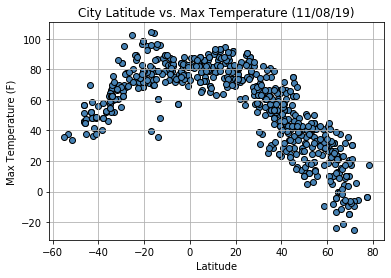

In [24]:
plt.scatter(x=city_weather_df['Latitude'], y=city_weather_df['Temperature'], c='steelblue', edgecolor='black')
plt.title('City Latitude vs. Max Temperature (11/08/19)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City Latitude vs. Max Temperature.png')

plt.show()

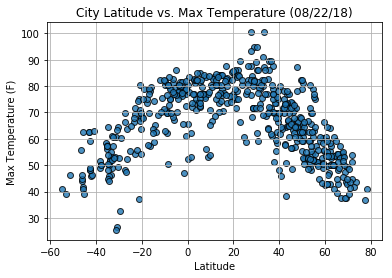

#### Latitude vs. Humidity Plot

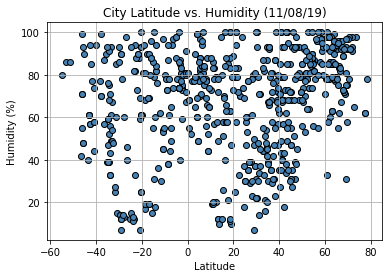

In [25]:
plt.scatter(x=city_weather_df['Latitude'], y=city_weather_df['Humidity'], c='steelblue', edgecolor='black')
plt.title('City Latitude vs. Humidity (11/08/19)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City Latitude vs. Humidity.png')

plt.show()

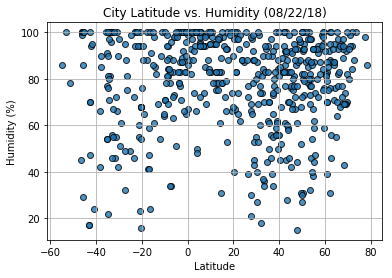

#### Latitude vs. Cloudiness Plot

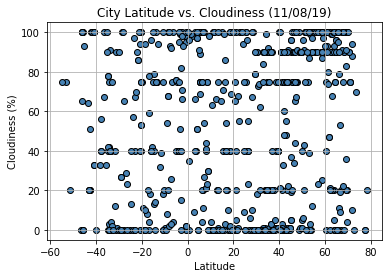

In [26]:
plt.scatter(x=city_weather_df['Latitude'], y=city_weather_df['Cloudiness'], c='steelblue', edgecolor='black')
plt.title('City Latitude vs. Cloudiness (11/08/19)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City Latitude vs. Cloudiness.png')

plt.show()

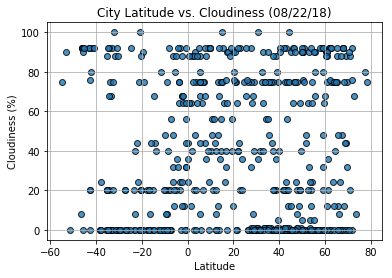

#### Latitude vs. Wind Speed Plot

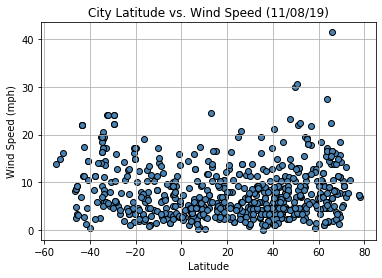

In [27]:
plt.scatter(x=city_weather_df['Latitude'], y=city_weather_df['Wind Speed'], c='steelblue', edgecolor='black')
plt.title('City Latitude vs. Wind Speed (11/08/19)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City Latitude vs. Wind Speed.png')

plt.show()

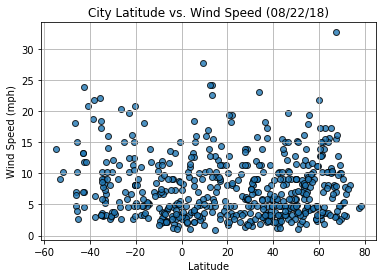